# 学習(勾配の更新)に関するテクニック
- SGD(確率的勾配降下法)
- Momentum

In [16]:
#最初のお約束の設定
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
#import common.gradient as g #例えば、本書の共通ライブラリを読み込む場合の設定
import numpy as np
import matplotlib.pylab as plt
######################################################

In [17]:
#グラフ描画のための追加の設定
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    # <- 明示的には使わないが、インポートしておく必要がある。
# Notebook出力には次の１行が必要（%matplotlib inlineだとグラフを回転できない）
%matplotlib notebook

## SGD(確率的勾配降下法)
### テキストの写経
基本的には、インスタンス変数として学習率（ハイパーパラメータ）を保持して、勾配で各パラメータを更新していくのみ。

In [3]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

## SGDの欠点
### 題材に関する数式

$$
    f(x,y) = \frac{1}{20}x^2 + y^2
$$

### グラフの描画

<IPython.core.display.Javascript object>


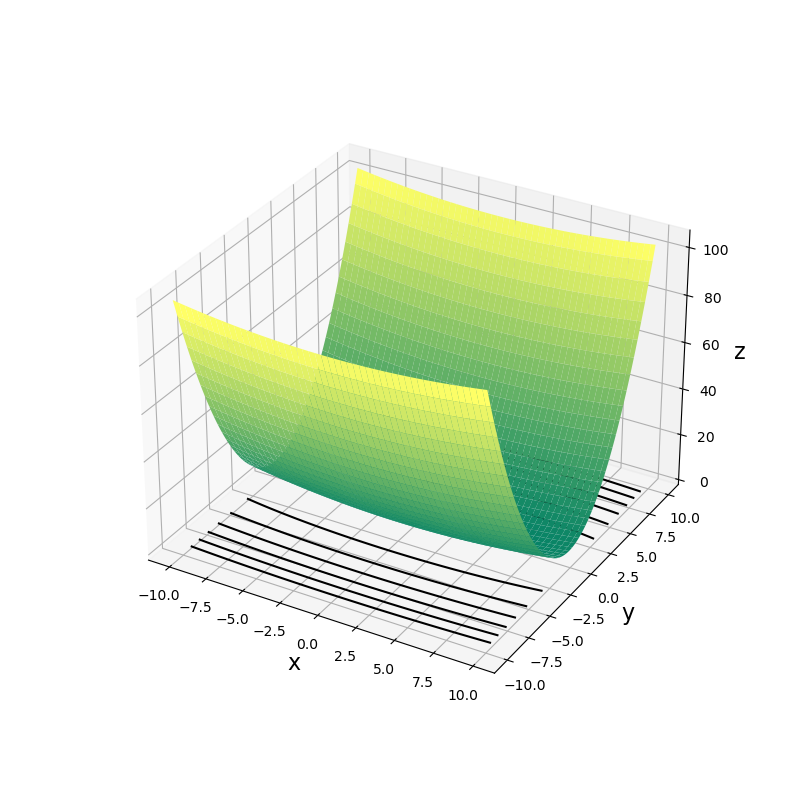

In [18]:
#def f(x, y):
#    return (1/20)*(x**2) + y**2 #numpyのブロードキャスト機能を活用

def f(args):
    return (1/20)*(args[0]**2) + args[1]**2 #numpyのブロードキャスト機能を活用

x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)

# Figureと3DAxeS
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")

# 軸ラベルを設定
ax.set_xlabel("x", size = 16)
ax.set_ylabel("y", size = 16)
ax.set_zlabel("z", size = 16)

# 格子点を作成
X, Y = np.meshgrid(x, y)

Z = f([X, Y])

# 曲面を描画
ax.plot_surface(X, Y, Z, cmap = "summer")

# 底面に等高線を描画
ax.contour(X, Y, Z, colors = "black", offset = -1)

plt.show()


### 勾配の様子の描画

<IPython.core.display.Javascript object>


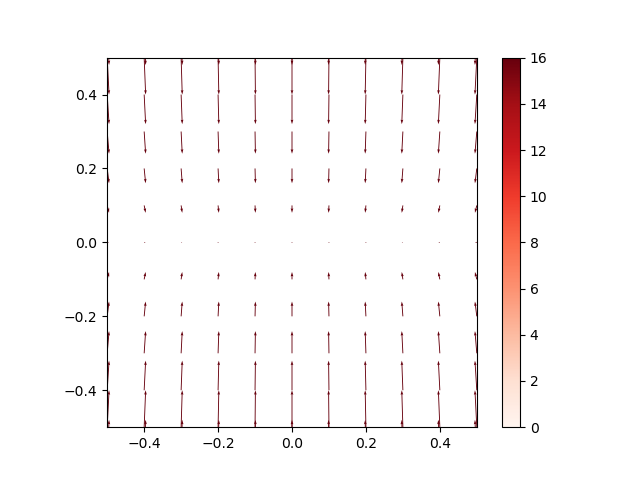

In [19]:
from common.gradient import numerical_gradient

px=[]
py=[]
vx=[]
vy=[]
colors=[]

x = np.arange(-5.0, 5.0, 0.1)
y = np.arange(-5.0, 5.0, 0.1)

#よくわからないので、とりあえず、力技
for _x in x:
    for _y in y:
        grad = numerical_gradient(f, np.array([_x,_y]))
        #得たgradは向きとして使えるが、向きは逆転させておく
        grad = -grad
        px.append(_x)
        py.append(_y)
        vx.append(grad[0]*0.1) # 見やすさのため、ベクトルの大きさを0.1しておく
        vy.append(grad[1]*0.1) # 同上
        colors.append(16)
        #colors.append((x_0**2+x_1**2)**1.5)
        
fig = plt.figure()
plt.gca().set_aspect('equal')
im = plt.quiver(px,py,vx,vy,colors, cmap='Reds', scale = 1,scale_units='xy')
plt.xlim(-0.5,0.5) #全体表示すると細かくて見えないので、範囲を小さくしてみる。
plt.ylim(-0.5,0.5)
fig.colorbar(im)
im.set_clim(0,16)
plt.show()

テキストで指摘されているように、この関数の最小値は(0,0)とのことだが、多くの点で、(0,0)の方向をダイレクトに指さないことがわかる。

[-6.334999999999862, -5.7331749999996955, -5.188523375004966, -4.695613654381086, -4.249530357215863, -3.845824973281558, -3.4804716008198726, -3.1498267987425326, -2.850593252860905, -2.57978689383847, -2.3347071389235245, -2.112909960725267, -1.9121835144561499, -1.7305260805829468, -1.5661261029274252, -1.4173441231492494, -1.2826964314499805, -1.1608402704622607, -1.0505604447684092, -0.9507572025154459, -0.8604352682765366, -0.7786939177903135, -0.704717995600218, -0.6377697860182076, -0.577181656346486, -0.522349398993575, -0.47272620608918164, -0.42781721651071153, -0.387174580942181, -0.350392995752689]
[-1.8000000000038003, 1.6200000000017294, -1.4579999999981847, 1.3121999999970972, -1.1809799999963362, 1.0628819999964882, -0.9565937999966319, 0.8609344199970708, -0.7748409779966288, 0.6973568801961187, -0.6276211921768267, 0.5648590729591934, -0.5083731656634356, 0.45753584909703593, -0.41178226418699293, 0.3706040377681584, -0.3335436339912141, 0.30018927059211564, -0.27017

<IPython.core.display.Javascript object>


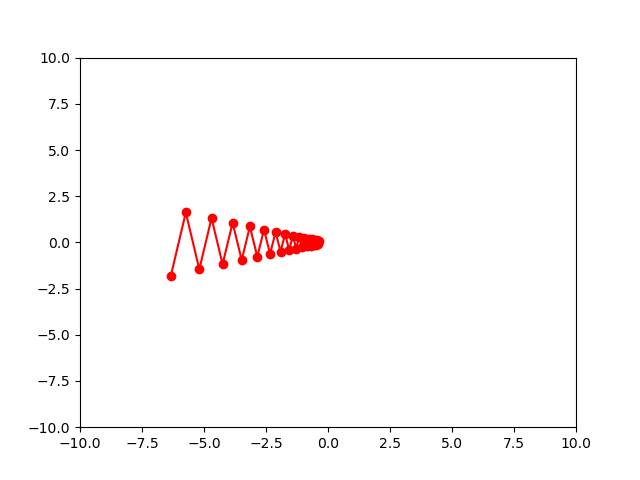

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook
#初期値
x = -7.0
y =  2.0

#グラフ描画用に、x,yの履歴を残しておく。
x_history = []
y_history = []
z_history = [] #使わない。将来的に等高線を導入した時用に残しておく。

optimizer = SGD(lr=0.95) #ch06/optimizer_compare_naive.pyより。このlrに設定しないと、試行回数30回程度ではうまくジグザグを描いてくれない。

for i in range(30):
    z = f(np.array([x, y]))
    grads_temp = numerical_gradient(f, np.array([x, y]))
    grads = {}
    grads["x"] = grads_temp[0]
    grads["y"] = grads_temp[1]
    pos = {}
    pos["x"] = x
    pos["y"] = y
    optimizer.update(pos, grads)
    x = pos["x"]
    y = pos["y"]
    x_history.append(x)
    y_history.append(y)
    z_history.append(z)
    
print(x_history)
print(y_history)

plt.xlim(-10.0,10)
plt.ylim(-10.0,10)

plt.plot(x_history, y_history, 'o-', color="red") #ハイフンをつけると、プロット間で直線を引いてくれる！
#plt.plot(x_history, y_history)

plt.show()

確かに、SGDではジグザグ状になり、効率的に最適解を求めていない感じがする。これがSGDの欠点とのことで、それを解決（≒軽減）するようなoptimzerが提案されている。

### ユーティリティ化
先ほどのSGDの描画処理は、他のoptimizerの時に使うため、関数化しておく。

<IPython.core.display.Javascript object>


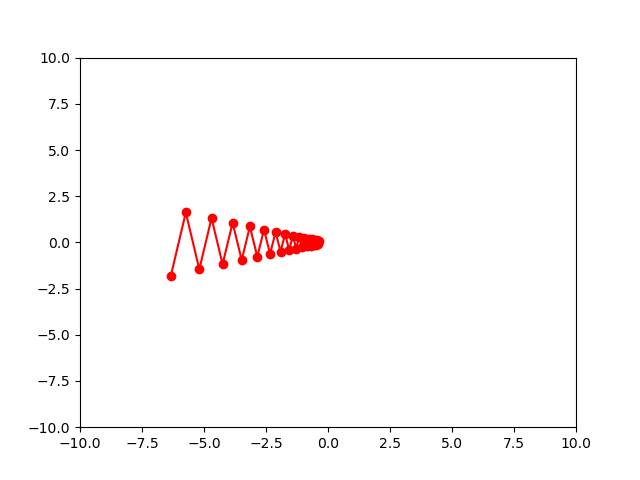

In [21]:
#optimizer: オプティマイザ関数を指定
#init_pos:初期値を指定
#func : 評価に使う関数を指定。
def eval_optimizer(optimizer = None, init_pos={"x": -7.0, "y": 2.0}, apply_func = f, count=30):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    #初期値
    x = init_pos["x"]
    y = init_pos["y"]

    #グラフ描画用に、x,yの履歴を残しておく。
    x_history = []
    y_history = []
    z_history = [] #使わない。将来的に等高線を導入した時用に残しておく。

    #optimizer = SGD(lr=0.95) #ch06/optimizer_compare_naive.pyより。このlrに設定しないと、試行回数30回程度ではうまくジグザグを描いてくれない。

    for i in range(count):
        z = apply_func(np.array([x, y]))
        grads_temp = numerical_gradient(f, np.array([x, y]))
        grads = {}
        grads["x"] = grads_temp[0]
        grads["y"] = grads_temp[1]
        pos = {}
        pos["x"] = x
        pos["y"] = y
        optimizer.update(pos, grads)
        x = pos["x"]
        y = pos["y"]
        x_history.append(x)
        y_history.append(y)
        z_history.append(z)

    plt.xlim(-10.0,10)
    plt.ylim(-10.0,10)

    plt.plot(x_history, y_history, 'o-', color="red") #ハイフンをつけると、プロット間で直線を引いてくれる！
    #plt.plot(x_history, y_history)

    plt.show()
    
#テスト
eval_optimizer(SGD(lr=0.95))

## Momentum
このアルゴリズムは、テキストで説明されているように、物理学でいう速度相当の変数を導入することにより、SGDと比較してジグザグを軽減させているとのこと。

### 数式から
$$
        \boldsymbol{v} ← \alpha \boldsymbol{v} - \eta\frac{\partial L}{\partial \boldsymbol{W}} \\
        \boldsymbol{W} ← \boldsymbol{W} + \boldsymbol{v}
$$

重み(W)の更新式を見れば明らかなように、一度、vを噛ませてから更新している。これにより、急激にWが更新されることを防いでいるのだろう。αの初期値を大きくすればするほど、更新が鈍く、小さければSGDなみに鋭くなるということだと思われる。なお、αがmementumというパラメータ、ηが学習係数である。

### 実装して理解(まずは自力で実装)

In [8]:
class MomentumMy:
    def __init__(self, lr=0.01, momentum=0.95):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = np.zeros_like(params) #誤り！
            
        for key in params.keys():
            self.v[key] = momentum * self.v[key] - self.lr * grads[key]
            params[key] = params[key] + self.v[key]

自力で実装してみたが、self.vの初期化部分に誤りがある。まず、ベクトルvは重みの種別(W1やW2など）毎に用意する必要がある。また、vは重みと同じ行列の形(shape)にする必要がある（縦、横の２次元の場合もあるし、縦のみの場合もある）。それを適切にzero初期化するnp.zeros.likeを使う。
修正版は以下。

### テキストを見て修正（完成版）

In [22]:
class MomentumMy:
    def __init__(self, lr=0.01, momentum=0.95):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, value in params.items(): #key(重みの種類)とそれに一致する重みの行列(あるいはベクトル)を列挙
                #self.v[key] = np.zeros.like(params[key]) # self.vを初期化していく。この処理でも良いが、valueを列挙しているので、
                self.v[key] = np.zeros_like(value) # ←のようにするべき。
            
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key] #num.pyのブロードキャスト機能を使って、処理していく。
            params[key] = params[key] + self.v[key]

### 性能を可視化（グラフに描画）

<IPython.core.display.Javascript object>


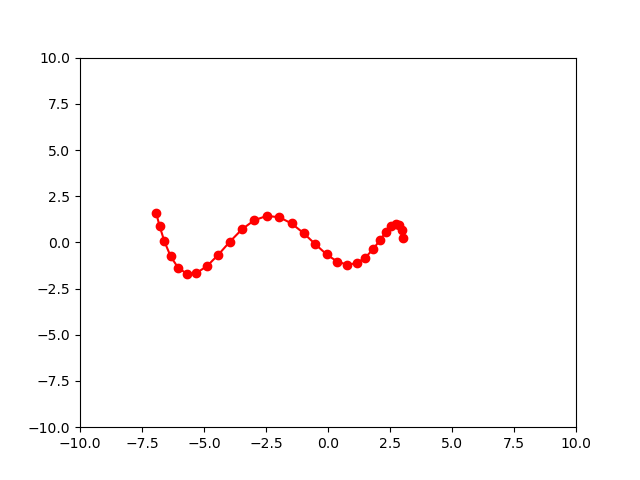

In [23]:
eval_optimizer(MomentumMy(lr=0.1),count=30)

確かに、vを導入することにより振れ幅が少なくなっている。また、SGDより少ないステップ数で(0,0)に到達しているようだ。ただし、(0,0)に到達した以降はそこに収束するのではなく、揺れを繰り返している。

<IPython.core.display.Javascript object>


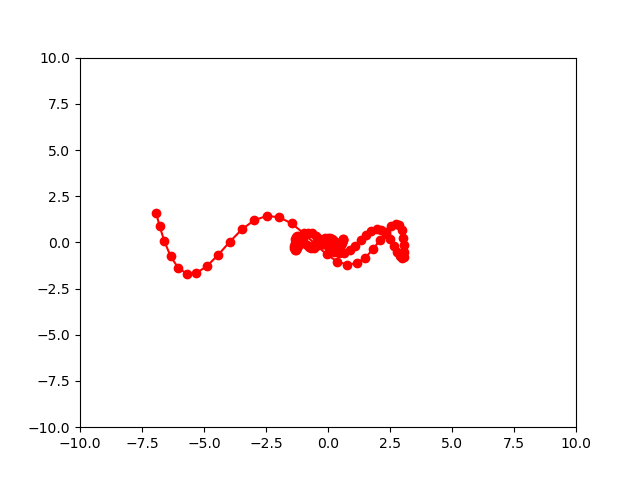

In [24]:
eval_optimizer(MomentumMy(lr=0.1),count=1000)

## AdaGrad
学習係数を減衰していくことでより効率的な収束を実現するアルゴリズム。
または、「AdaGrad はこれまでのステップの勾配の大きさを記録し、学習率を調整するアルゴリズムです。」
https://pystyle.info/pytorch-adagrad-rmsprop-adadelta/

### 数式から理解

$$
    \boldsymbol{h} ← \boldsymbol{h} + \frac{\partial{L}}{\partial{\boldsymbol{W}}} \odot \frac{\partial{L}}{\partial{\boldsymbol{W}}} \\
    \boldsymbol{W} ← \boldsymbol{W} - \eta \frac{1}{\sqrt{\boldsymbol{h}}}\frac{\partial{L}}{\partial{\boldsymbol{W}}}\\
$$

まず、最初にηは学習率。

AdaGrad はこれまでのステップの勾配の大きさを記録するというが、その記録自体がhである。
以下のアダマール積が勾配の大きさである。普通、ベクトルの大きさ（ノルム）は各要素を２乗したものの和のルートを取るが、ルートを取り除いた、すなわち、ノルムの２乗をhとして保持しておく。Wの更新の際に√hとすることで、ノルム化している。

$$
    \frac{\partial{L}}{\partial{\boldsymbol{W}}} \odot \frac{\partial{L}}{\partial{\boldsymbol{W}}}
$$

以下、Wに関する解釈（実機で確認後に再度確認する）。

√hは、行列hに√を取ったものになっている。これは、行列hの各要素に√をかぶせるものである。その逆数1/√hも同様で、√hの各要素の逆数を取る。その後、行列1/√hと以下の行列の積を取る（1/√hと掛ける対象の以下の行列で行列の積がとれるよう、shapeが整合性取れている必要あり）。

$$
    \frac{\partial{L}}{\partial{\boldsymbol{W}}}
$$

勾配と勾配のアダマール積を実施することで、計算結果として得られる行列の各要素から負の要素がなくなり、√hは矛盾なく実現できる。また、その逆数を掛けることで勾配が大きければ勾配が小さく重みに反映され、勾配が小さければ、勾配が大きく重みに反映されることになる。

### pythonのウォーミングアップ理解
まず、AdaGradで使うnp.sqrtのブロードキャストや除算の効果について確認しておく。

In [25]:
#numpyの行列に対して、np.sqrtをすると（ブロードキャスト）すると、どうなるか？

A = np.array([[2,2,2],[2,2,2],[2,2,2]])
A = np.sqrt(A)
print(A)

B = np.array([[2.8,2.8,2.8],[2.8,2.8,2.8],[2.8,2.8,2.8]])

print(B/A) #全要素がほぼ２。
print(B/B) #全要素が1
print(A/A) #全要素が1

print(np.zeros_like(A)) #shape=(3,3)の全要素0の行列が生成

[[1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356]]
[[1.97989899 1.97989899 1.97989899]
 [1.97989899 1.97989899 1.97989899]
 [1.97989899 1.97989899 1.97989899]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### 理解を深めるため最初に自力で実装してみる

In [26]:
class AdaGradMy:
    def __init__(self, lr=0.01):
        self.h = None
        self.lr = lr #数式で言う所のη
        self.epsilon = 1e-7
    
    def update(self, params, grads):
        
        if self.h is None:
            self.h = {}
            for key in params.keys():
                self.h[key] = 0
        
        #updating h and W
        for key in params.keys():
            self.h[key] = self.h[key] + grads[key] * grads[key]
            params[key] = params[key] - self.lr * 1/(np.sqrt(self.h[key]) + self.epsilon) * grads[key]

テキストとの実装の違いは以下。結論からいうと、事前にテキストの答えを盗み見ていたため、あんまり間違いはなかった。
- 0除算を考慮したεが分母に加算されてない→反映済み
- self.h[key]の初期化はテキストはnp.zeros_like(value)を利用。これは、自力版の実装でも良い。なぜなら、スカラー(0)で初期化してもnumpyのブロードキャストが適切に処理して、ループの最初のself.hの初期化の際に適切に行列になるため。

それでは、評価をしてみる。

<IPython.core.display.Javascript object>


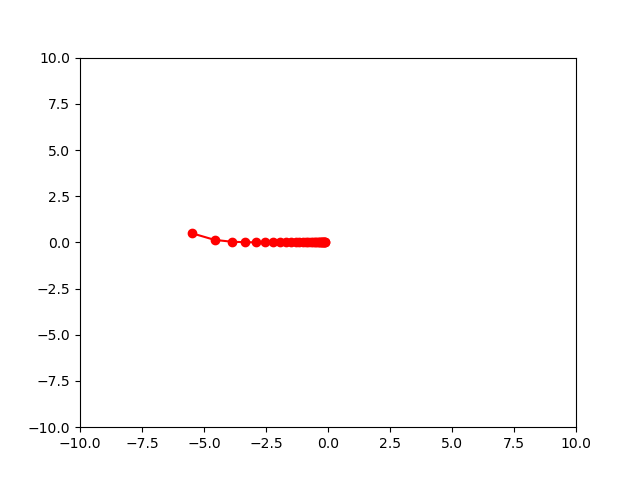

In [27]:
eval_optimizer(AdaGradMy(lr=1.5),count=30)

ステップ数=30の場合にて、Momentumと違ってブレなく(0,0)に収束している。それでは、count=10000にして試してみる。

<IPython.core.display.Javascript object>


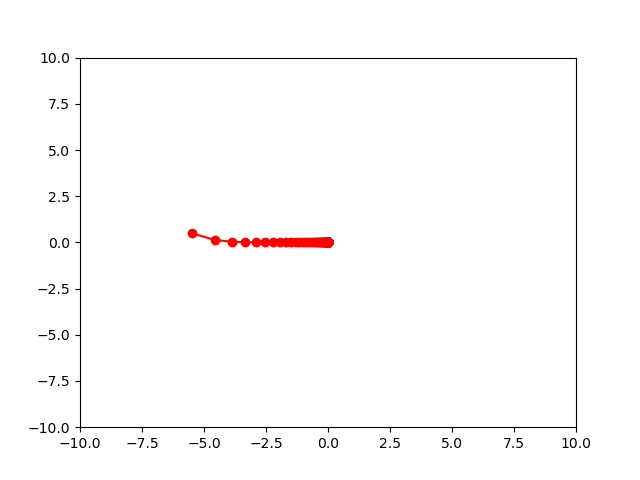

In [28]:
eval_optimizer(AdaGradMy(lr=1.5),count=10000)

同じような結果となり、Momentumとちがって、AdaGradはブレることも無く綺麗に(0,0)に収束しているようだ。最適化が進む毎に勾配が段々と小さくなることにより、hの更新量がほぼ行われなくなる。なので以下の項が０に近づくことによって、重みの更新も行われなくなるという、最適化の処理ループを重ねる毎に重みの更新量が低くなるというAdaGradの働きが見える。

$$
    \eta \frac{1}{\sqrt{\boldsymbol{h}}}\frac{\partial{L}}{\partial{\boldsymbol{W}}}\\
$$

## Adam
### 数式から理解

テキストでは理論に踏み込まないとあるので、自力で情報を収集して理解してみる。


以下が最強にわかりやすい！
https://qiita.com/omiita/items/1735c1d048fe5f611f80